In [54]:
import pandas as pd
import numpy as np

Data isn't in utf8, use latin1 encoding with ';' delimiter

In [55]:
books = pd.read_csv("BX-Books.csv", delimiter=';', encoding="latin-1", error_bad_lines=False)
users = pd.read_csv('BX-Users.csv', delimiter=";", encoding="latin1")
ratings = pd.read_csv('BX-Book-Ratings.csv', delimiter=";", encoding="latin1")

/home/iutukart/data_science/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3457: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 

Let's look on User's dataset

In [56]:
users.describe()

,User-ID,Age
count,278858.00000,168096.000000
mean,139429.50000,34.751434
std,80499.51502,14.428097
min,1.00000,0.000000
25%,69715.25000,24.000000
50%,139429.50000,32.000000
75%,209143.75000,44.000000
max,278858.00000,244.000000


In [57]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


Users are fine, the Age column isn't a problem if we wiil not do recommender system based on age

Let's look on Books df

In [58]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [59]:
books.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L'],
      dtype='object')

Drop useless columns

In [60]:
books = books.drop(columns=['Image-URL-S', 'Image-URL-M', 'Image-URL-L'])

In [61]:
books.dtypes

ISBN                   object
Book-Title             object
Book-Author            object
Year-Of-Publication    object
Publisher              object
dtype: object

Year is not an integer, so it can be bad. Let's look on non-numeric values in this column

In [62]:
years = books['Year-Of-Publication'].unique()

In [63]:
num_years = []
wrong = []
for y in years:
    if isinstance(y, int) or y.isnumeric():
        num_years.append(y)
    else:
        wrong.append(y)

In [64]:
wrong

['DK Publishing Inc', 'Gallimard']

There are 2 "years", we need to control

In [65]:
wrong_y_books = books[books['Year-Of-Publication'].isin(wrong)]

In [66]:
wrong_y_books

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg


Let's fix their values

In [67]:
books.loc[books['Year-Of-Publication'].isin(['DK Publishing Inc']), 'Year-Of-Publication'] = 2000
books.loc[books.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books.loc[books.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"

In [68]:
books.loc[books['Year-Of-Publication'].isin(['Gallimard']), 'Year-Of-Publication'] = 2003
books.loc[books.ISBN == '2070426769','Book-Author'] = 'Jean-Marie Gustave Le ClÃ?Â©zio'
books.loc[books.ISBN == '2070426769','Publisher'] = 'Gallimard'

In [69]:
books['Year-Of-Publication'] = books['Year-Of-Publication'].astype(int)

In [70]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271359 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271358 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


In [71]:
books.loc[books.Publisher.isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [72]:
books.loc[books.ISBN == '193169656X','Publisher'] = "Unknown"
books.loc[books.ISBN == '1931696993','Publisher'] = "Unknown"

ALso fixed NaN Publishers, which are actually doesn't matter

In [73]:
books.loc[books['Book-Author'].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing


In [74]:
books.loc[books.ISBN == '9627982032','Book-Author'] = "Edinburgh Financial Publishing (Books) Limited" #internet (:

In [75]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 5 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271360 non-null  object
 3   Year-Of-Publication  271360 non-null  int64 
 4   Publisher            271360 non-null  object
dtypes: int64(1), object(4)
memory usage: 10.4+ MB


So books are ready too.
Let's look on ratings df

In [76]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [77]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [78]:
ratings.describe()

,User-ID,Book-Rating
count,1.149780e+06,1.149780e+06
mean,1.403864e+05,2.866950e+00
std,8.056228e+04,3.854184e+00
min,2.000000e+00,0.000000e+00
25%,7.034500e+04,0.000000e+00
50%,1.410100e+05,0.000000e+00
75%,2.110280e+05,7.000000e+00
max,2.788540e+05,1.000000e+01


Rating is ready. Let's merge our dataframes in one.

In [79]:
df = pd.merge(pd.merge(ratings, users, on='User-ID'), books, on='ISBN')

In [80]:
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,"cincinnati, ohio, usa",23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,"strafford, missouri, usa",34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,"st. charles county, missouri, usa",2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,"beaverton, oregon, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,"fort lee, new jersey, usa",NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,"fort lee, new jersey, usa",NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,"wakeman, ohio, usa",43.0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,"cedar park, texas, usa",NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In this big block I tried to code location on gps cords for somewhat. Actually that was really slow and remained as idea.

In [81]:
df['Location'] = df['Location'].str.replace(',', ' ')

In [82]:
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,tyler texas usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,cincinnati ohio usa,23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,strafford missouri usa,34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county missouri usa,2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton oregon usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,fort lee new jersey usa,NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,fort lee new jersey usa,NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,wakeman ohio usa,43.0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,cedar park texas usa,NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


In [83]:
df['Location'] = df['Location'].str.strip()

In [84]:
df

,User-ID,ISBN,Book-Rating,Location,Age,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276725,034545104X,0,tyler texas usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,cincinnati ohio usa,23.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,strafford missouri usa,34.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,st. charles county missouri usa,2.0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,beaverton oregon usa,NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...,...,...
1031131,276688,0517145553,0,fort lee new jersey usa,NaN,Mostly Harmless,Douglas Adams,1995,Random House Value Pub
1031132,276688,1575660792,7,fort lee new jersey usa,NaN,Gray Matter,Shirley Kennett,1996,Kensington Publishing Corporation
1031133,276690,0590907301,0,wakeman ohio usa,43.0,Triplet Trouble and the Class Trip (Triplet Trouble),Debbie Dadey,1997,Apple
1031134,276704,0679752714,0,cedar park texas usa,NaN,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997,Vintage Books USA


I can try to encode Locations to gps cords, but it's a lot of time. It could be used in a recommendation based on geolocation(local books topic)

In [85]:
#!pip install geopy

In [86]:
#import pandas as pd
#from geopy.geocoders import Photon
#import geopy.distance


In [87]:
#geolocator = Photon(user_agent="loc-encoder")

In [88]:
#location = geolocator.geocode(df['Location'][0])

In [89]:
#print(location.latitude, location.longitude)


In [90]:
#def geoencode(x):
#    location = geolocator.geocode(x)
#    if location is None:
#        return np.array([0, 0])
#    return np.array([location.latitude, location.longitude])
#
#df['Location'] = df['Location'].apply(lambda x : geoencode(x))

In [91]:

#df['Location'][0] =  geoencode(df['Location'][0])

Ok, just drop Location

In [92]:
df = df.drop(columns=['Location'])

Let's try a collaborative filtering on raw data, which I prepared

In [93]:
from fastai.learner import *
from fastai.tabular import *
from fastai.collab import *
import torch
from sklearn.preprocessing import StandardScaler

torch.cuda.is_available()

True

In [93]:
data  = CollabDataLoaders.from_df(df, item_name='Book-Title', seed=42, shuffle_train=True)
data.show_batch()
y_range = ((df['Book-Rating'].min(),
            df['Book-Rating'].max()+0.5))

learn = collab_learner(data, n_factors=8,  y_range=y_range, wd=1e-2, use_nn=True)

,User-ID,Book-Title,Book-Rating
0,236757,Miracle at St. Anna,0
1,118010,Trucos Peligrosos - 5,6
2,106534,Das Kartengeheimnis. ( Ab 13 J.).,0
3,265115,Underdog: A Melanie Travis Mystery,9
4,206074,Diamond Spur,10
5,127200,Paradise Wild,0
6,153513,The Handmaid's Tale,0
7,35859,Counterattack (The Corps Book 3),0
8,113030,SHAMPOO PLANET : SHAMPOO PLANET,0
9,49889,The Dowry of Miss Lydia Clark (The Gresham Chronicles),0


SuggestedLRs(valley=0.005248074419796467)

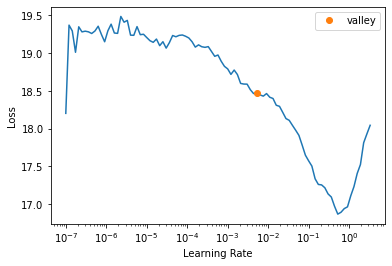

In [94]:
learn.lr_find()

In [95]:
learn.fit_one_cycle(5, 5.25e-03)


epoch,train_loss,valid_loss,time
0,11.921231,11.555480,10:50
1,11.464069,11.368433,11:01
2,10.231507,11.830780,10:52
3,8.878764,12.357109,10:56
4,7.383898,13.117724,11:01


A little bit of overlearning, but it's fine. The best number of epochs is 3 we can use that next time. But it's a bad loss, so let's explore the data better.

Let's see how ratings values are distributed 

/home/iutukart/data_science/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


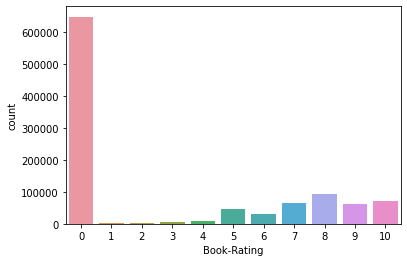

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(df['Book-Rating'])
plt.show()

We have most of 0 ratings and a little of other, "valid" ratings, let's fit a model with only data with ratings 1 to 10

In [94]:
df_without_0 =  df[df['Book-Rating'] != 0]

In [95]:
from fastai.tabular import *
from fastai.collab import *
data  = CollabDataLoaders.from_df(df_without_0, item_name='Book-Title', seed=42, shuffle_train=True)
y_range = ((df_without_0['Book-Rating'].min(),
            df_without_0['Book-Rating'].max()+0.5))

In [96]:
learn = collab_learner(data, n_factors=8,  y_range=y_range, wd=1e-2, use_nn=True)

SuggestedLRs(valley=0.14454397559165955)

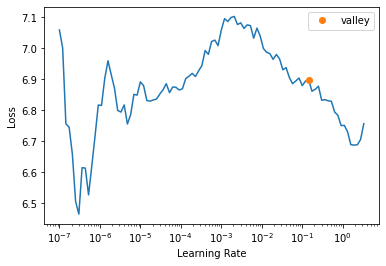

In [111]:
learn.lr_find()

In [104]:
learn.fit_one_cycle(4, 9.1e-03)

epoch,train_loss,valid_loss,time
0,2.706993,2.760967,03:48
1,2.457801,2.681259,03:54
2,1.885773,2.774846,03:51
3,1.337965,2.878277,03:52


SuggestedLRs(valley=0.004365158267319202)

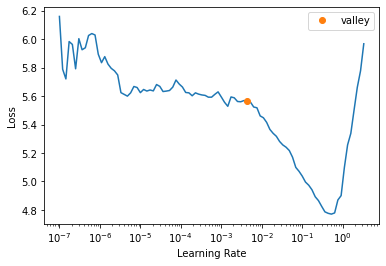

In [107]:
learn = collab_learner(data, n_factors=8,  y_range=y_range, wd=5e-2, use_nn=True)
learn.lr_find()

In [108]:
learn.fit_one_cycle(2, 1.58e-02)

epoch,train_loss,valid_loss,time
0,2.715946,2.778736,03:51
1,2.549512,2.652020,03:51


In [109]:

learn.save("recommender_model")

Path('models/recommender_model.pth')

In [39]:
g = df_without_0.groupby('Book-Title')['Book-Rating'].count()
top_books = g.sort_values(ascending=False).index.values[:500]
top_books[:10]

array(['The Lovely Bones: A Novel', 'Wild Animus', 'The Da Vinci Code',
       'The Secret Life of Bees', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', "Bridget Jones's Diary",
       'A Painted House', 'Life of Pi',
       'Harry Potter and the Chamber of Secrets (Book 2)'], dtype=object)

In [97]:
from fastai.basics import *
from fastai.callback.all import *
from fastai.vision.all import *
from fastai.tabular import *
from fastai.collab import *
learn.load('recommender_model')

In [48]:
learn.show_results()

,User-ID,Book-Title,Book-Rating,Book-Rating_pred
0,16259,117913,10,8.513837
1,48825,60019,6,7.700583
2,46766,38350,10,8.430622
3,6790,81744,10,9.966345
4,0,67556,10,7.980992
5,45365,98677,8,9.108068
6,0,5479,10,7.489055
7,40818,80306,7,8.002939
8,0,113520,7,7.327447


In [113]:
from fastai.torch_basics import *
data  = CollabDataLoaders.from_df(df_without_0, item_name='Book-Title', seed=42, shuffle_train=True)
y_range = ((df_without_0['Book-Rating'].min(),
            df_without_0['Book-Rating'].max()+0.5))

In [116]:
learn = collab_learner(data, n_factors=32,  y_range=y_range, wd=1e-2, use_nn=False)

SuggestedLRs(valley=0.14454397559165955)

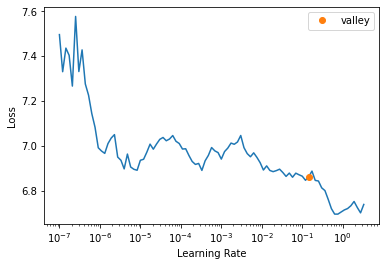

In [117]:
learn.lr_find()

In [118]:
learn.fit_one_cycle(5, 4.5e-03)

epoch,train_loss,valid_loss,time
0,3.977552,3.929704,01:48
1,2.947530,3.306493,01:46
2,1.642995,3.325674,01:39
3,1.038494,3.318001,01:42
4,0.681767,3.326726,01:35


In [122]:
g = df_without_0.groupby('Book-Title')['Book-Rating'].count()
top_books = g.sort_values(ascending=False).index.values[:500]
top_books[:10]


array(['The Lovely Bones: A Novel', 'Wild Animus', 'The Da Vinci Code',
       'The Secret Life of Bees', 'The Nanny Diaries: A Novel',
       'The Red Tent (Bestselling Backlist)', "Bridget Jones's Diary",
       'A Painted House', 'Life of Pi',
       'Harry Potter and the Chamber of Secrets (Book 2)'], dtype=object)

Make sense , despite the valid error. Let's look on bias

In [125]:
book_bias = learn.model.bias(top_books, is_item=True)
book_bias.shape

torch.Size([500])

In [126]:
mean_ratings = df_without_0.groupby('Book-Title')['Book-Rating'].mean()
book_ratings = [(b, i, mean_ratings.loc[i]) for i,b in zip(top_books,book_bias)]

Worst books

In [167]:
item0 = lambda o:o[0]
sorted(book_ratings, key=item0)[:15]

[(tensor(-0.5559), 'Wild Animus', 4.3907056798623065),
 (tensor(-0.2336), 'Four Blondes', 5.393939393939394),
 (tensor(-0.2171), 'Isle of Dogs', 5.433962264150943),
 (tensor(0.0584),
  "Songs in Ordinary Time (Oprah's Book Club (Paperback))",
  6.53030303030303),
 (tensor(0.0617),
  "Vinegar Hill (Oprah's Book Club (Paperback))",
  6.685393258426966),
 (tensor(0.0653), 'Slow Waltz in Cedar Bend', 6.619718309859155),
 (tensor(0.1093),
  'The Tale of the Body Thief (Vampire Chronicles (Paperback))',
  7.188888888888889),
 (tensor(0.1467), 'Southern Cross', 6.7375),
 (tensor(0.1569), 'Riptide', 7.129032258064516),
 (tensor(0.1743), 'The Corrections', 6.712121212121212),
 (tensor(0.1750), 'White Teeth: A Novel', 7.444444444444445),
 (tensor(0.1763),
  'The Diary of Ellen Rimbauer: My Life at Rose Red',
  7.175675675675675),
 (tensor(0.1775), 'Bleachers', 6.583333333333333),
 (tensor(0.1813), 'Easy Prey', 7.3125),
 (tensor(0.1865),
  "Full House (Janet Evanovich's Full Series)",
  6.9203539

In [129]:
sorted(book_ratings, key=lambda o: o[0], reverse=True)[:15]

[(tensor(1.1609), 'To Kill a Mockingbird', 8.97752808988764),
 (tensor(1.1301),
  'Harry Potter and the Order of the Phoenix (Book 5)',
  9.04739336492891),
 (tensor(1.1167),
  "Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  8.936507936507937),
 (tensor(1.1096),
  "Ender's Game (Ender Wiggins Saga (Paperback))",
  8.920529801324504),
 (tensor(1.1023), 'A Prayer for Owen Meany', 8.615384615384615),
 (tensor(1.0526), 'A Wrinkle In Time', 8.876543209876543),
 (tensor(1.0198),
  'Harry Potter and the Goblet of Fire (Book 4)',
  9.125506072874494),
 (tensor(0.9970),
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson",
  8.588),
 (tensor(0.9913), 'Dune (Remembering Tomorrow)', 8.973333333333333),
 (tensor(0.9897), 'The Little Prince', 9.11111111111111),
 (tensor(0.9709), '1984', 8.784722222222221),
 (tensor(0.9485), 'Interpreter of Maladies', 8.430379746835444),
 (tensor(0.9389), "Charlotte's Web (Trophy Newbery)", 9.073529411764707),
 (tensor(

In [130]:
book_w = learn.model.weight(top_books, is_item=True)
book_w.shape

torch.Size([500, 32])

Let's analyze recommender an look what books in 3 main components of model

In [143]:
book_pca = book_w.pca(3)
book_pca.shape

torch.Size([500, 3])

First component

In [144]:
fac0,fac1,fac2 = book_pca.t()
movie_comp = [(f, i) for f,i in zip(fac0, top_books)]

Best books

In [145]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.2641), 'The Giver (21st Century Reference)'),
 (tensor(1.1534), 'A Confederacy of Dunces (Evergreen Book)'),
 (tensor(1.1129),
  'Into Thin Air : A Personal Account of the Mt. Everest Disaster'),
 (tensor(1.0116), "Ender's Game (Ender Wiggins Saga (Paperback))"),
 (tensor(0.9778), 'On Writing'),
 (tensor(0.9024), 'Life of Pi'),
 (tensor(0.8914), 'Lord of the Flies'),
 (tensor(0.8544), 'The Rapture of Canaan'),
 (tensor(0.8304), 'Cold Mountain : A Novel'),
 (tensor(0.8227), 'Atlas Shrugged')]

Best seller 'Life of Pi'

Nobel Prize 'Lord of the Files'

and others.

Bestsellers novels

Let's look on worst books

In [147]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.2294), 'The Street Lawyer'),
 (tensor(-1.1772), 'A Painted House'),
 (tensor(-1.1699),
  "Tuesdays with Morrie: An Old Man, a Young Man, and Life's Greatest Lesson"),
 (tensor(-1.0260), 'A Walk to Remember'),
 (tensor(-0.9902), 'The Rescue'),
 (tensor(-0.9688), 'Slow Waltz in Cedar Bend'),
 (tensor(-0.9443), 'The Horse Whisperer'),
 (tensor(-0.9401), 'The King of Torts'),
 (tensor(-0.9101), 'The Notebook'),
 (tensor(-0.8872), 'The Testament')]

Ok, let's see the second component

In [148]:
movie_comp = [(f, i) for f,i in zip(fac1, top_books)]

Best books

In [152]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3038), 'The Perks of Being a Wallflower'),
 (tensor(1.1853), 'The Great Gatsby'),
 (tensor(1.1334), 'Wild Animus'),
 (tensor(1.1000), 'Girl with a Pearl Earring'),
 (tensor(1.0705), 'The Poisonwood Bible'),
 (tensor(1.0257), 'Watership Down'),
 (tensor(1.0160), "A Thousand Acres (Ballantine Reader's Circle)"),
 (tensor(0.9469), 'The House on Mango Street (Vintage Contemporaries)'),
 (tensor(0.9335), "Drowning Ruth (Oprah's Book Club)"),
 (tensor(0.9203), 'Chicken Soup for the Soul (Chicken Soup for the Soul)')]

Fanatsies and Domestic fiction

Worst books

In [153]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-1.0901),
  "The Color of Water: A Black Man's Tribute to His White Mother"),
 (tensor(-1.0037), "East of Eden (Oprah's Book Club)"),
 (tensor(-0.9924), 'Interview with the Vampire'),
 (tensor(-0.9896), 'Prey: A Novel'),
 (tensor(-0.9556), 'The Eyre Affair: A Novel'),
 (tensor(-0.8202), 'A Child Called \\It\\": One Child\'s Courage to Survive"'),
 (tensor(-0.8069), 'The Amber Spyglass (His Dark Materials, Book 3)'),
 (tensor(-0.8049), 'The Phantom Tollbooth'),
 (tensor(-0.7694), 'The Firm'),
 (tensor(-0.7671), 'The Queen of the Damned (Vampire Chronicles (Paperback))')]

In [155]:
movie_comp = [(f, i) for f,i in zip(fac2, top_books)]

In [156]:
sorted(movie_comp, key=itemgetter(0), reverse=True)[:10]

[(tensor(1.3102), 'Divine Secrets of the Ya-Ya Sisterhood: A Novel'),
 (tensor(1.0491), 'The Red Tent (Bestselling Backlist)'),
 (tensor(1.0384), 'Harry Potter and the Prisoner of Azkaban (Book 3)'),
 (tensor(0.9861), 'Timeline'),
 (tensor(0.9444), 'The Poisonwood Bible: A Novel'),
 (tensor(0.9007), 'The Rescue'),
 (tensor(0.8899), 'Mortal Prey'),
 (tensor(0.8170), 'The House of the Spirits'),
 (tensor(0.8135), 'Digital Fortress : A Thriller'),
 (tensor(0.8038), 'The Perks of Being a Wallflower')]

In [ ]:
Thrillers, fantasies 

In [157]:
sorted(movie_comp, key=itemgetter(0))[:10]

[(tensor(-2.2726), 'Wild Animus'),
 (tensor(-1.1417), "She's Come Undone (Oprah's Book Club)"),
 (tensor(-1.1232), 'Summer Sisters'),
 (tensor(-1.1220), 'A Confederacy of Dunces (Evergreen Book)'),
 (tensor(-1.0466),
  'Politically Correct Bedtime Stories: Modern Tales for Our Life and Times'),
 (tensor(-1.0394), 'The Corrections'),
 (tensor(-1.0121), 'Neuromancer (Remembering Tomorrow)'),
 (tensor(-0.7908), "Where the Heart Is (Oprah's Book Club (Paperback))"),
 (tensor(-0.7785), "Gerald's Game"),
 (tensor(-0.7676), 'I Know Why the Caged Bird Sings')]

First third components 

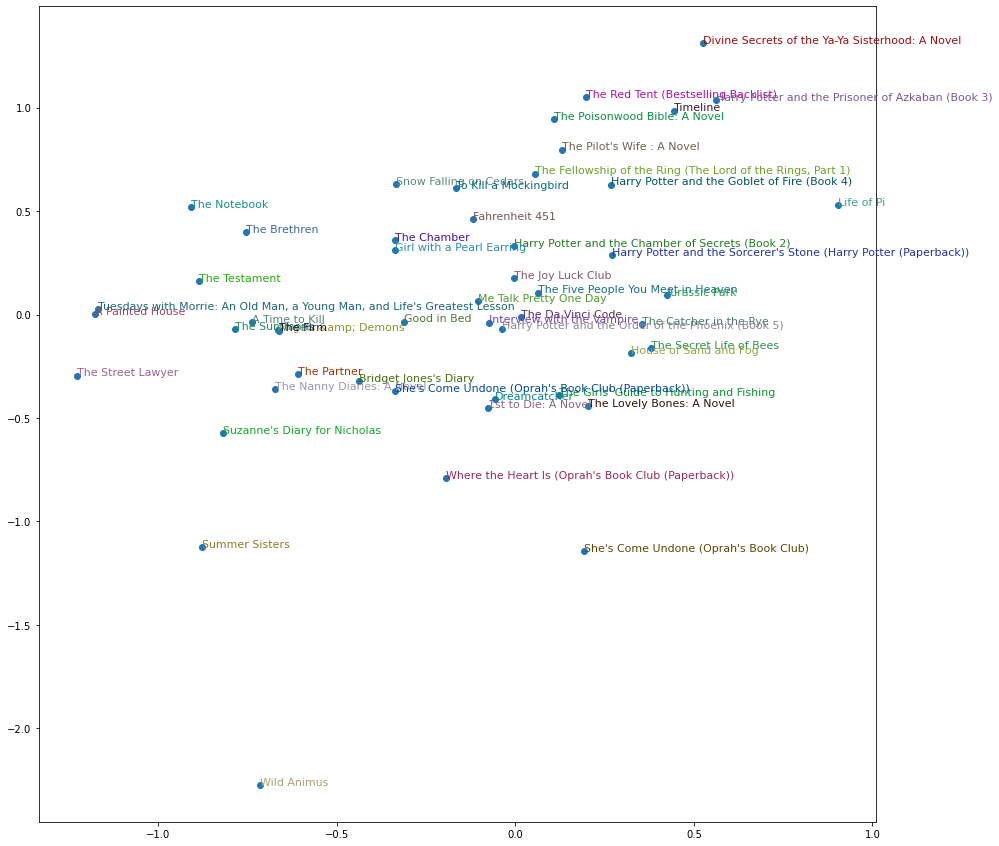

In [184]:
from mpl_toolkits.mplot3d import Axes3D  # podivame se na data


idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()


First and second

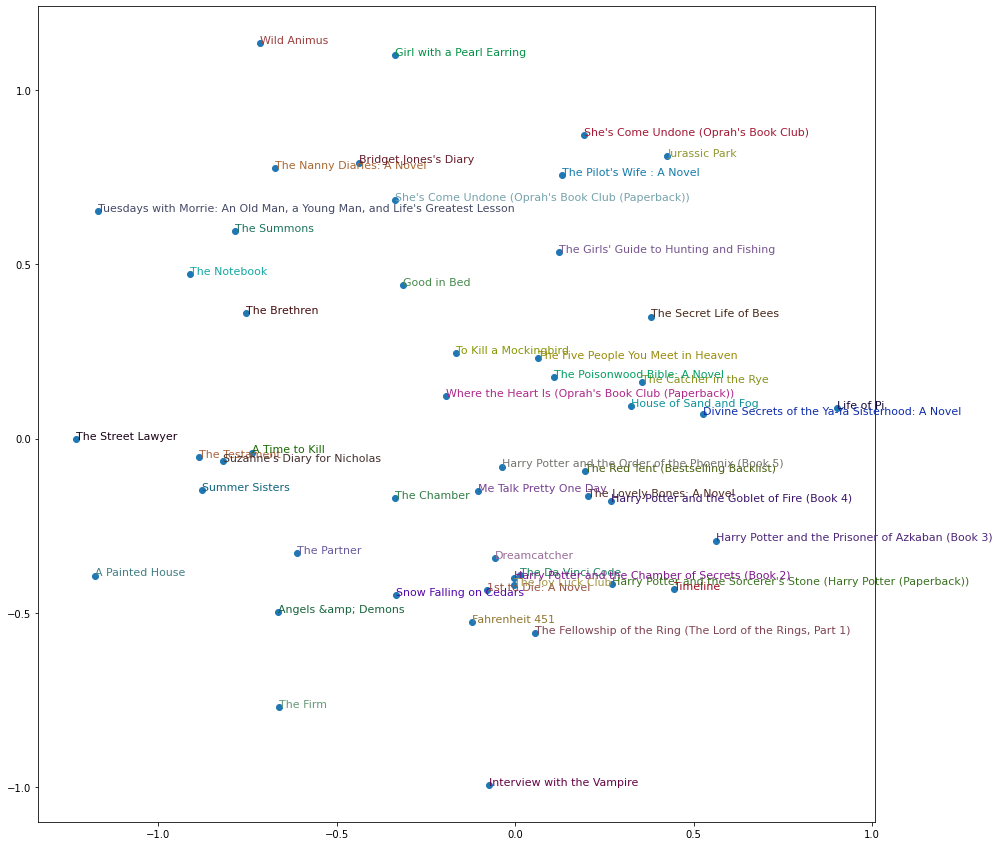

In [185]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac0[idxs]
Y = fac1[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()

Second and third

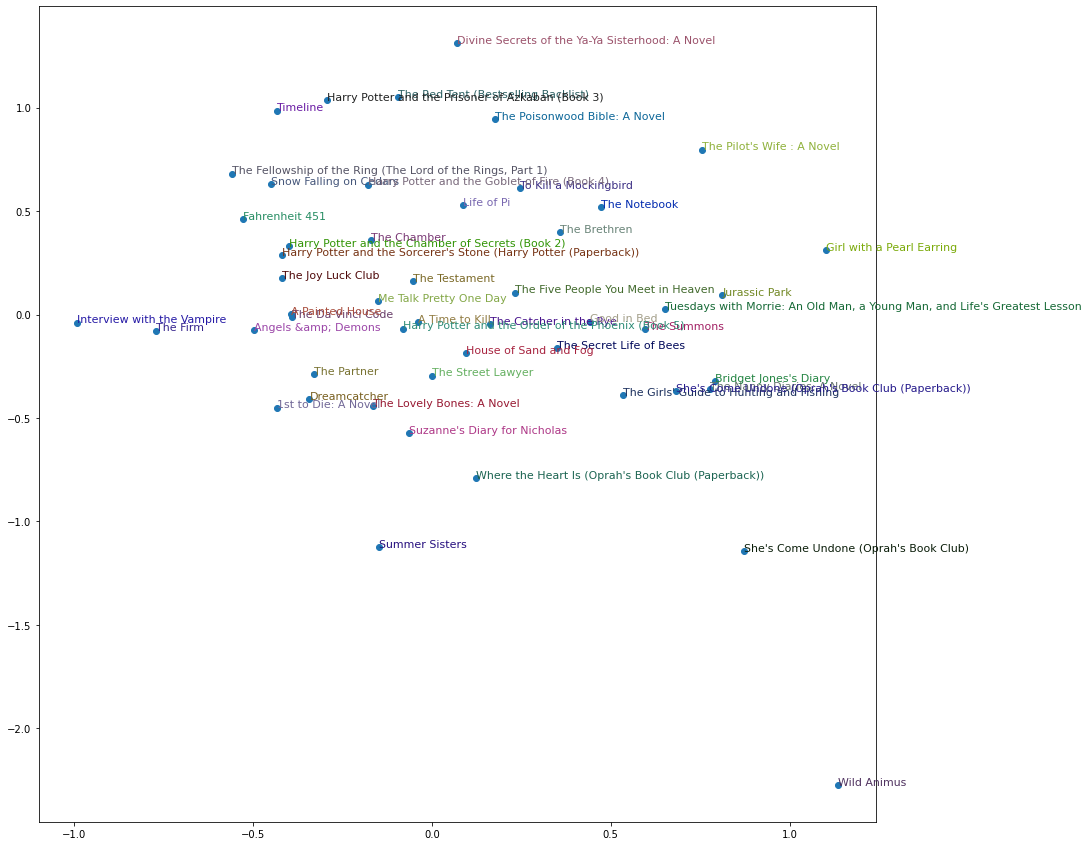

In [186]:
idxs = np.random.choice(len(top_books), 50, replace=False)
idxs = list(range(50))
X = fac1[idxs]
Y = fac2[idxs]
plt.figure(figsize=(15,15))
plt.scatter(X, Y)
for i, x, y in zip(top_books[idxs], X, Y):
    plt.text(x,y,i, color=np.random.rand(3)*0.7, fontsize=11)
plt.show()